## Dataset Description:
### ABC Private Limited, a retail company, wants to understand customer purchase behavior, especially the purchase amount for various products across different categories. They aim to build a predictive model to forecast purchase amounts for personalized offers.

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [167]:
# Load the dataset
df = pd.read_csv('blackFriday_Data.csv')

In [168]:
df.head() # To check the first 5 rows of the data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [169]:
# to check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [170]:
# Check for missing values
print(df.isnull().sum())

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64


### Product_Category_2 and Product_Category_3 has high numbers of missing values which needs to be addressed, otherwise it will affect the outcome of the model                                

In [172]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [173]:
# check for duplicate values
duplicates = df.duplicated()
print(duplicates)

0         False
1         False
2         False
3         False
4         False
          ...  
550063    False
550064    False
550065    False
550066    False
550067    False
Length: 550068, dtype: bool


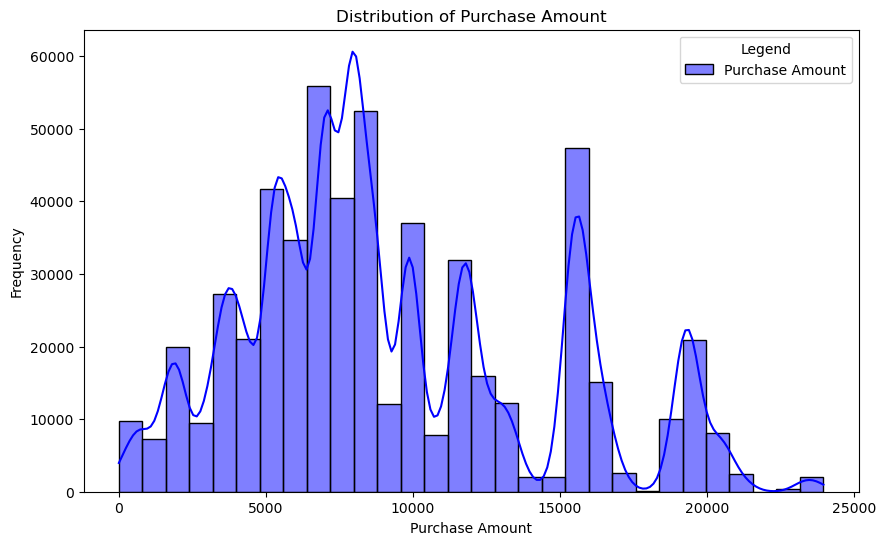

In [174]:
# To Understand overall spending behavior we can visualize using histogram
# Histogram for univariante Analysis to check the purchase amount distribution 

plt.figure(figsize=(10, 6))
sns.histplot(df['Purchase'], bins=30, kde=True, color='blue', label='Purchase Amount')
plt.title('Distribution of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.legend(title='Legend')
plt.show()

#### While the highest amount of purchase is close to 25000,a purchase amount of 7000 stood at the highest peak. 
#### however the distribution shows more purchase between 0 and 15000 below a frequency of 4,500 . The purchase is not evenly distributed, there are outliers.

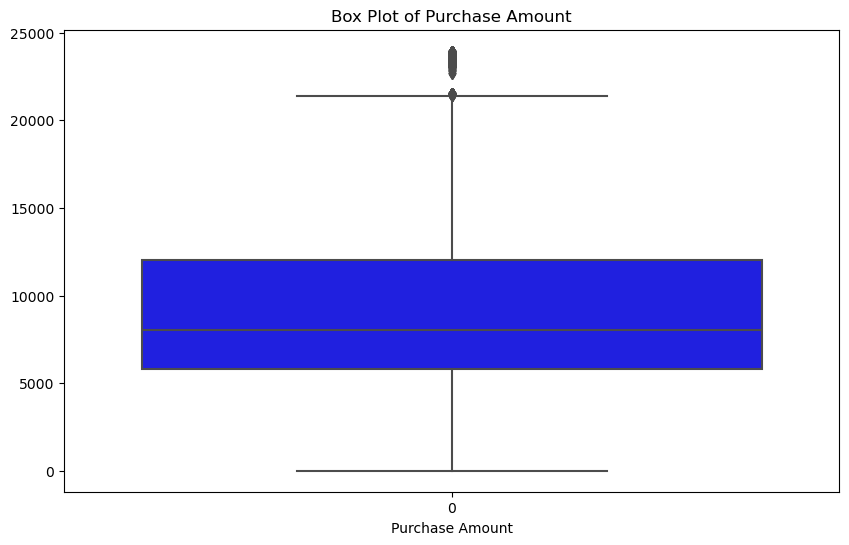

In [176]:
# Box Plot for Purchase Amount can also help understand from the original data(df)
plt.figure(figsize=(10, 6))
sns.boxplot(df['Purchase'], color='blue')
plt.title('Box Plot of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.show()

 #### Similarly the box plot has clearly indicated the outliers above the whisker which is a little over 20000 purchase amount and the median line not centered means the data is skewed 
#### By looking at the interquartile range (IQR=Q3−Q1) the blue portion is indicating where most of our data lies.

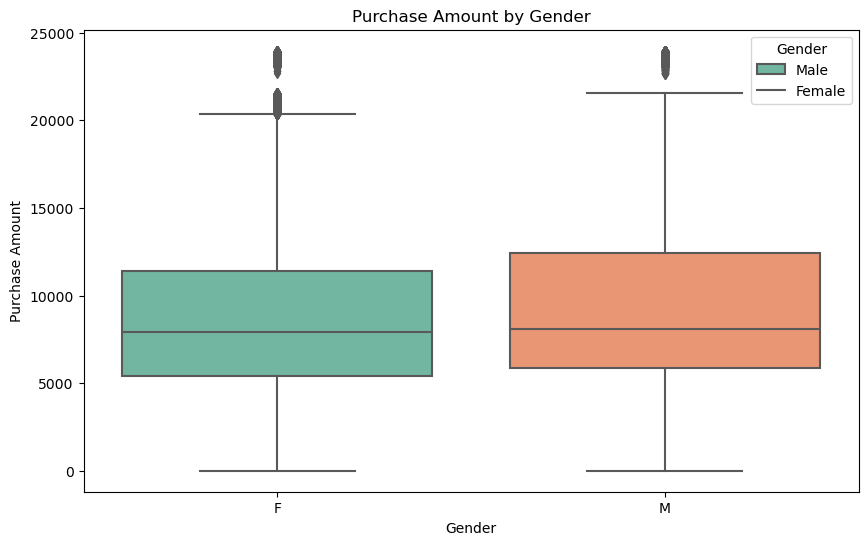

In [178]:
# Visualising the Bivariante Analysis for comparing two varables
# Purchase vs. Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Purchase', data=df, palette='Set2', showfliers=True)
plt.title('Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()


### No significant difference but the male gender seems to have a little age over the female gender in terms of purchase amount and more outliers in female gender too

In [180]:
# to check the gender counts
gender_counts = df['Gender'].value_counts()
gender_counts

Gender
M    414259
F    135809
Name: count, dtype: int64

#### Male highly dominates the female gender

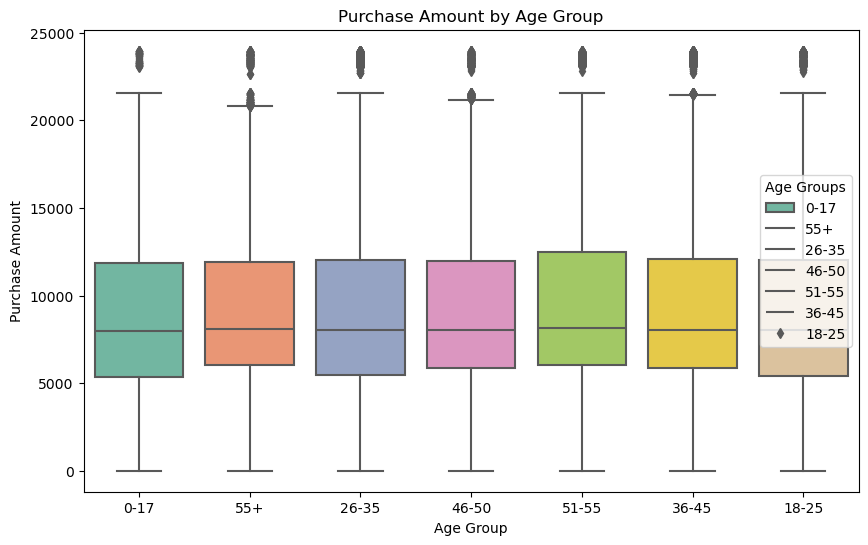

In [182]:
# more Bivariante Analysis 
# Purchase vs. Age
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Purchase', data=df, palette='Set2', showfliers=True)
plt.title('Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Purchase Amount')
plt.legend(title='Age Groups', labels=df['Age'].unique())
plt.show()

### there is some uniformity in the purchase amount and behavioural pattern across all age groups with outliers in all categories. 
### Ages 55+ , 46-50 and 36-45 even seems to have more outliers.

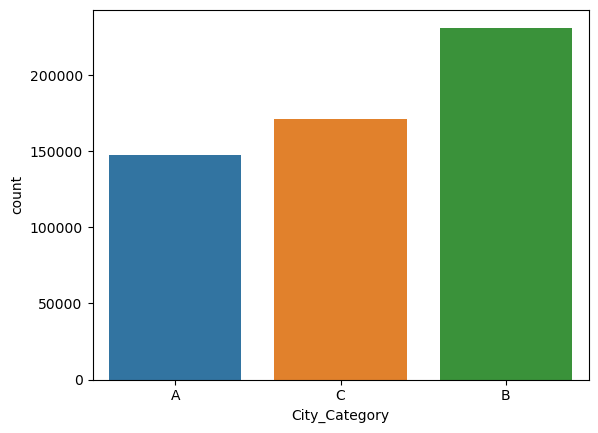

In [184]:
# Bar plot for categorical data
sns.countplot(x='City_Category', data=df)
plt.show()

#### City category B has more purchases than C and A. 

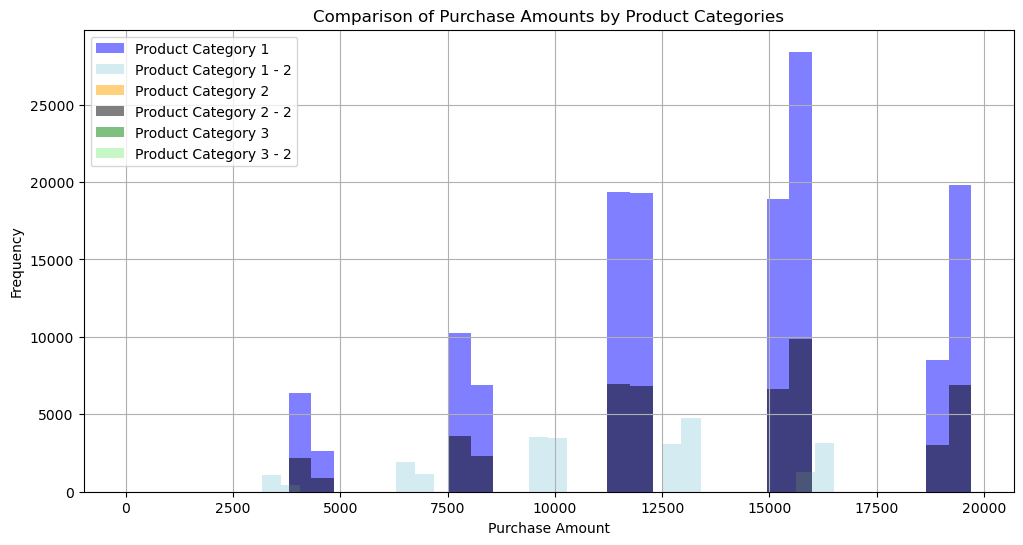

In [186]:
# I will now check the purchase amount across different product categories

# Set up the figure
plt.figure(figsize=(12, 6))

# Histogram for Product_Category_1
plt.hist(df[df['Product_Category_1'] == 1]['Purchase'], bins=30, alpha=0.5, label='Product Category 1', color='blue')
plt.hist(df[df['Product_Category_1'] == 2]['Purchase'], bins=30, alpha=0.5, label='Product Category 1 - 2', color='lightblue')

# Histogram for Product_Category_2
plt.hist(df[df['Product_Category_2'] == 1]['Purchase'], bins=30, alpha=0.5, label='Product Category 2', color='orange')
plt.hist(df[df['Product_Category_2'] == 2]['Purchase'], bins=30, alpha=0.5, label='Product Category 2 - 2', color='black')

# Histogram for Product_Category_3
plt.hist(df[df['Product_Category_3'] == 1]['Purchase'], bins=30, alpha=0.5, label='Product Category 3', color='green')
plt.hist(df[df['Product_Category_3'] == 2]['Purchase'], bins=30, alpha=0.5, label='Product Category 3 - 2', color='lightgreen')

# Adding titles and labels
plt.title('Comparison of Purchase Amounts by Product Categories')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()

#### Product_category-1 with the purchase amount of 15000 tops in all aspects followed by 2

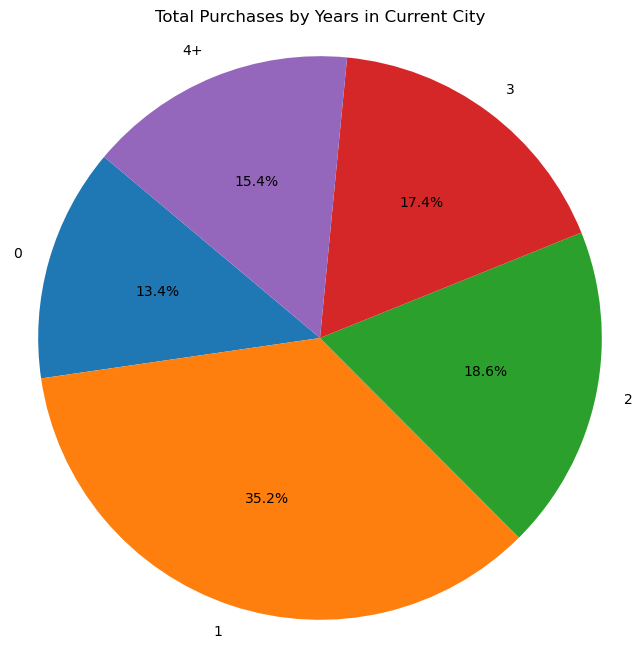

In [188]:
# Group by 'Stay_In_Current_City_Years' and sum purchases
purchase_by_stay = df.groupby('Stay_In_Current_City_Years')['Purchase'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(purchase_by_stay, labels=purchase_by_stay.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Purchases by Years in Current City')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Those who did not stay long in the city are valuable customers with more purchase sum especially year 1 (35.2%- Highest) , yet there are some emerging customers who are not yet living in the city


In [190]:
# Let's asses the outliers statistically and solve the issue
from scipy.stats import zscore  # zscore will help normalise the data 

# Calculate the Z-scores of your data points
df['z_score'] = zscore(df['Purchase'])
outliers = df[(df['z_score'] > 3) | (df['z_score'] < -3)] # if the zscore is less than -3 and greater than 3 we have outliers

# Calculate the IQR and define outliers
Q1 = df['Purchase'].quantile(0.25)
Q3 = df['Purchase'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Purchase'] < (Q1 - 1.5 * IQR)) | (df['Purchase'] > (Q3 + 1.5 * IQR))]

# We can cap them with the nearest non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Purchase'] = np.where(df['Purchase'] < lower_bound, lower_bound, df['Purchase'])
df['Purchase'] = np.where(df['Purchase'] > upper_bound, upper_bound, df['Purchase'])

In [191]:
# I will first Replace infinite values with NaN before imputation to deal with extreme values that may distrupt the analysis
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,z_score
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368.0,-1.771025
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371.0,-1.770428
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137.0,-1.817013
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365.0,-1.771623
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490.0,-1.746737


In [192]:
# I will move to impute
# Impute missing values with the mean to maintain dataset integrity for the purpose of analysis
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mean())
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mean())
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,z_score
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.842329,12.668243,8370.0,-0.177973
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,14.000000,15200.0,1.181756
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.842329,12.668243,1422.0,-1.561193
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.000000,12.668243,1057.0,-1.633858
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.842329,12.668243,7969.0,-0.257805


In [193]:
# The missing values are now replaced by the mean.

In [194]:
# to verify non null values
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
z_score                       0
dtype: int64

#### After the imputation there is no indication of null values, which will be good for our model.

In [196]:
# Get unique counts for each product category
product_counts = {
    'Product_Category_1': df['Product_Category_1'].value_counts().sum(),
    'Product_Category_2': df['Product_Category_2'].value_counts().sum(),
    'Product_Category_3': df['Product_Category_3'].value_counts().sum()
}

# Display the counts
for category, counts in product_counts.items():
    print(f"Counts for {category}:\n{counts}\n")

Counts for Product_Category_1:
550068

Counts for Product_Category_2:
550068

Counts for Product_Category_3:
550068



In [197]:
# Check unique values in Stay_In_Current_City_Years
print(df['Stay_In_Current_City_Years'].unique())

#Replace '4+' with '5' and convert to integer
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace({'4+': '5'})
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

# Verify the conversion
print(df['Stay_In_Current_City_Years'].unique())  # Check unique values after conversion

['2' '4+' '3' '1' '0']
[2 5 3 1 0]


In [198]:
# replace categorical values 
from sklearn.preprocessing import OneHotEncoder

# One-hot encode 'City_Category'
city_encoder = OneHotEncoder(sparse=False, drop='first')  # Drop first to avoid dummy variable trap
encoded_categories = city_encoder.fit_transform(df[['City_Category']])
encoded_df = pd.DataFrame(encoded_categories, columns=city_encoder.get_feature_names_out(['City_Category']))

# One-hot encode 'Gender'
gender_encoder = OneHotEncoder(sparse=False, drop='first')  # Drop first to avoid dummy variable trap
gender_encoded = gender_encoder.fit_transform(df[['Gender']])
gender_df = pd.DataFrame(gender_encoded, columns=gender_encoder.get_feature_names_out(['Gender']))


print("\nEncoded City_Category:")
print(encoded_df)
print("\nEncoded Gender:")
print(gender_df)


Encoded City_Category:
        City_Category_B  City_Category_C
0                   0.0              0.0
1                   0.0              0.0
2                   0.0              0.0
3                   0.0              0.0
4                   0.0              1.0
...                 ...              ...
550063              1.0              0.0
550064              0.0              1.0
550065              1.0              0.0
550066              0.0              1.0
550067              1.0              0.0

[550068 rows x 2 columns]

Encoded Gender:
        Gender_M
0            0.0
1            0.0
2            0.0
3            0.0
4            1.0
...          ...
550063       1.0
550064       0.0
550065       0.0
550066       0.0
550067       0.0

[550068 rows x 1 columns]


#### everything is now changed to numerical values

In [200]:
# Combine encoded data with the original DataFrame (excluding original categorical columns)
df_encoded = pd.concat([df.drop(columns=['City_Category', 'Gender']), encoded_df, gender_df], axis=1)

In [201]:
# Define the target variable (dependent variable)
y = df_encoded['Purchase']

# Define the independent variables (features)
X = df_encoded.drop(columns=['Purchase', 'User_ID', 'Product_ID', 'Age'])

In [202]:
print("\nFinal Encoded DataFrame Types:")
print(df_encoded.dtypes)


Final Encoded DataFrame Types:
User_ID                         int64
Product_ID                     object
Age                            object
Occupation                      int64
Stay_In_Current_City_Years      int32
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
z_score                       float64
City_Category_B               float64
City_Category_C               float64
Gender_M                      float64
dtype: object


In [203]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encoder setup
age_encoder = OneHotEncoder(sparse=False, drop='first')

# Fit and transform the Age column
encoded_age = age_encoder.fit_transform(df_encoded[['Age']])
encoded_age_df = pd.DataFrame(encoded_age, columns=age_encoder.get_feature_names_out(['Age']))

# Combine with the original DataFrame (excluding the original Age column)
df_encoded = pd.concat([df_encoded.drop(columns=['Age']), encoded_age_df], axis=1)

In [204]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = df_encoded.select_dtypes(include=['int64', 'float64'])  # Select numerical columns
df_encoded[numerical_features.columns] = scaler.fit_transform(numerical_features)

In [205]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor  # For regression tasks
from sklearn.metrics import mean_squared_error, r2_score

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [207]:
model = GradientBoostingRegressor(n_estimators=150, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=150, random_state=42)

In [208]:
y_pred = model.predict(X_test)

In [209]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 569.3729203418957
R^2 Score: 0.9999771344041073


#### The model has performed extremely well with  R^2 Score: 0.99 and the MSE is very low compared to the actual mean of the purchase amount

In [210]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 16.69910785497318


#### With a deviation of 16 the model is showing an excellent performance 

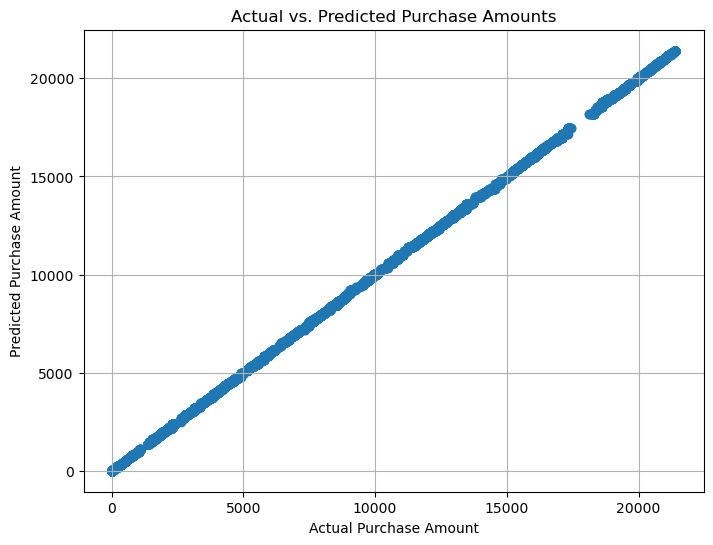

In [254]:
# To visualize the perfomance
# actual purchase amounts in a list called 'y_test'
# predicted purchase amounts in a list called 'y_pred'

plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.scatter(y_test, y_pred)

plt.xlabel('Actual Purchase Amount')
plt.ylabel('Predicted Purchase Amount')
plt.title('Actual vs. Predicted Purchase Amounts')

plt.grid(True)
plt.show()

#### the points align perfectly at 45 degrees where the actual equals to predicted, this shows a strong correlation between actual and predicted values

### Insights = {
    'Trends': """
        - The highest recorded purchase amounton the actual data is close to 25,000, but there was a significant spike at 7,000, indicating a strong frequency of purchases around this value.
        - The majority of purchases are concentrated between 0 and 15,000, with a maximum frequency of about 4,500. 
        - The distribution of purchases is not even; there are notable outliers, particularly above 20,000, suggesting skewness in the data which I later addressed
        - The box plot reveals outliers beyond the whisker, confirming the presence of extreme values.
        - The interquartile range (IQR) indicates that most of the data lies within the blue portion of the box plot, highlighting the central tendency of the purchase amounts.
    """,
    
    'Correlations': """
        - There is a slight trend indicating that male customers tend to have a marginally higher average purchase amount compared to females, although the difference is not significant.
        - Interestingly, the female demographic shows more outliers in purchase amounts, suggesting variability in spending behavior.
        - Across all age groups, there is a consistent purchasing pattern, with outliers present in each category, particularly in the 55+, 46-50, and 36-45 age ranges.
        - City Category B outperforms Category A and C in terms of purchase amounts, indicating a potential market preference or demographic advantage.
        - Product Category 1 leads in purchase amounts, peaking at 15,000, followed closely by Product Category 2.
    """,
    
    'recommendations': """
        - Focus on targeting customers who make purchases around the 7,000 mark, as they represent a significant segment of the market.
        - Consider strategies to engage the female demographic, particularly in addressing the higher number of outliers, to stabilize spending patterns.
        - Explore promotional opportunities in City Category B to capitalize on its higher purchasing power.
        - Investigate the behavioral patterns of customers who have recently moved into the city (especially those within the first year), as they represent valuable opportunities, with 35.2% of purchases coming from this group.
        - Encourage loyalty programs or incentives for customers aged 55+ and those in the 46-50 and 36-45 age groups to convert outlier purchases into consistent spending.
    """
}
